# S14 T01: Tasca base de dades NoSQL

## Exercise 1


Create a NoSQL database using MongoDB. Add some sample data to help you verify that you are able to process the information in a basic way.

I have created a database using a json dataset called Consolats a la ciutat de Barcelona https://opendata-ajuntament.barcelona.cat/data/ca/dataset/consolats-bcn

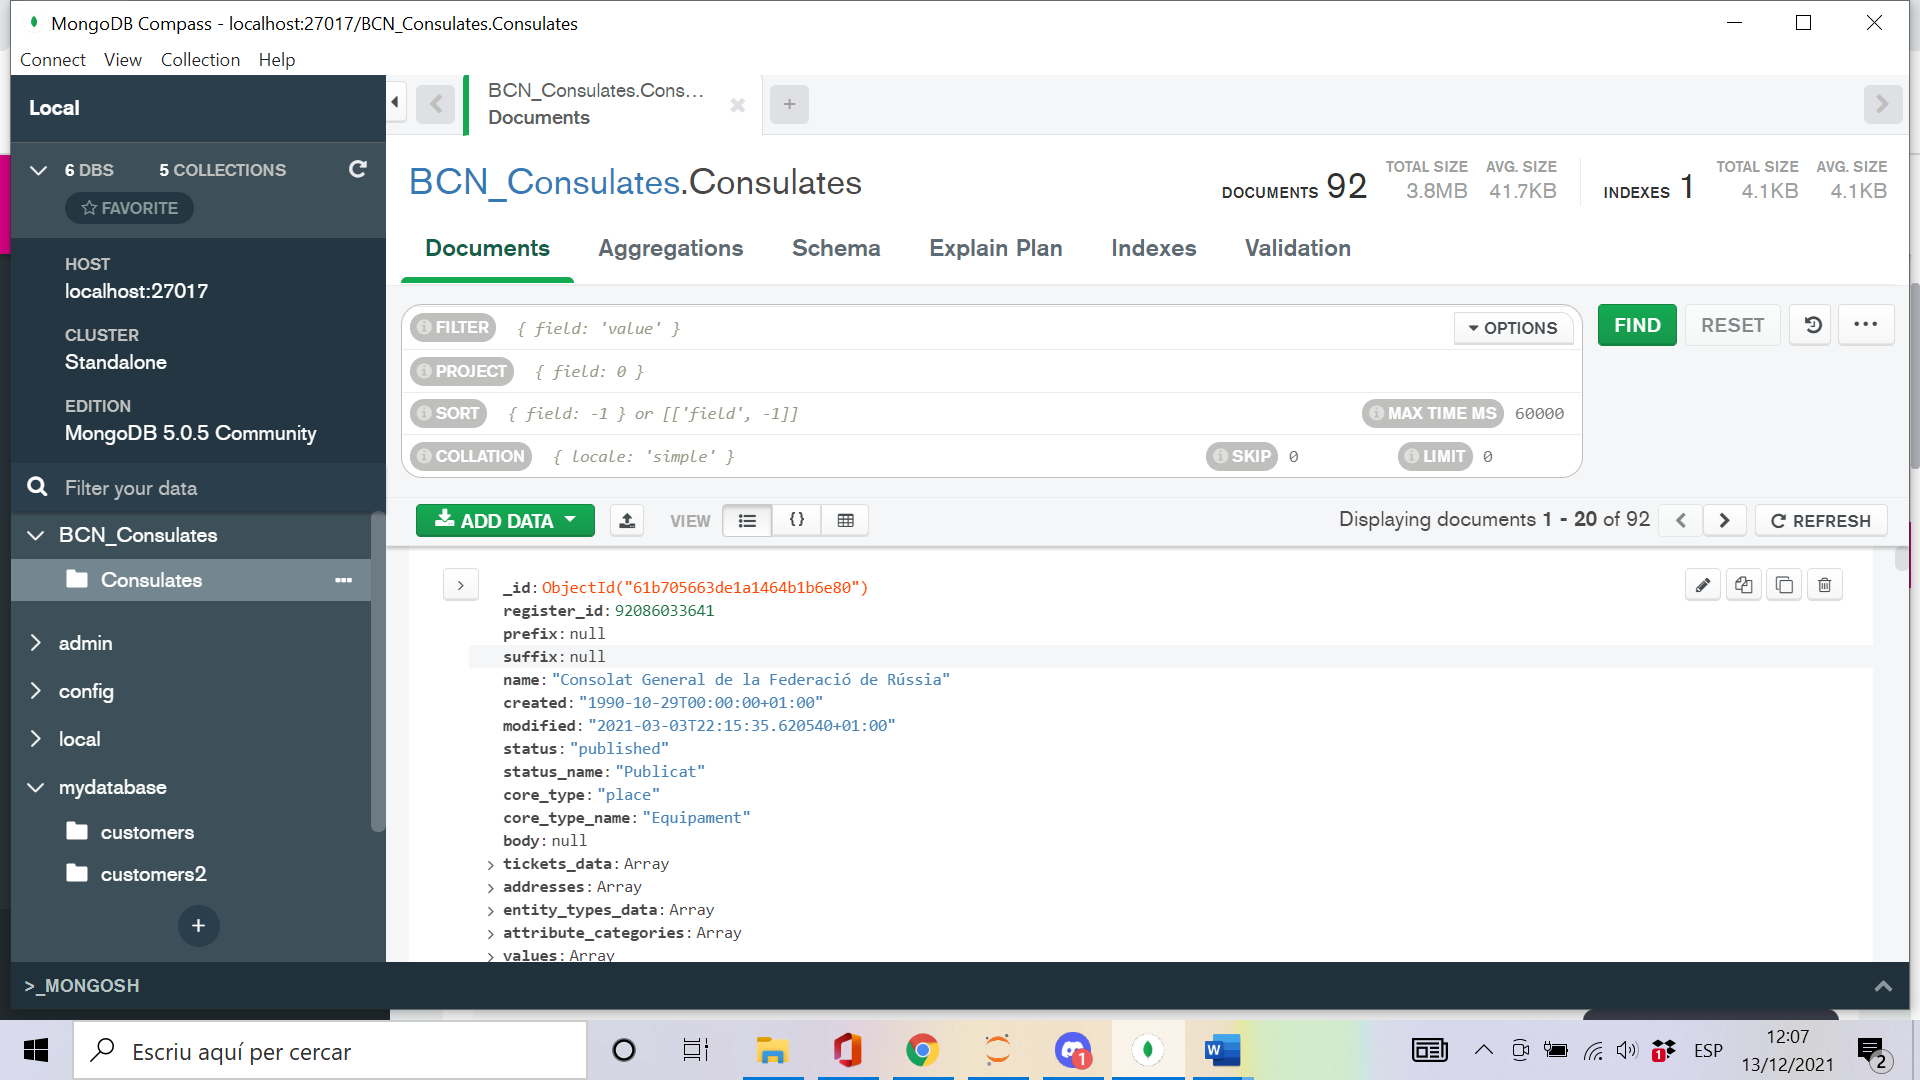

In [1]:
from IPython.display import Image

Image(filename='Mongo DB Consulates.png',width=800, height=400)

After experimenting with the database trying different queries and modifications, I proceed to connect it to Python.

## Exercise 2

Connect the NoSQL database to Python using for example pymongo.

In [2]:
# Importing libraries

import pymongo
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize
from pymongo import MongoClient
from pymongo.collection import Collection
from pymongo.database import Database

In [3]:
# Connecting MongoDB and "Consulates"

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["BCN_Consulates"]

In [4]:
mycol = mydb["Consulates"]

In [5]:
# Printing the first document

for x in mycol.find().limit(1):
  print(x)

{'_id': ObjectId('61b705663de1a1464b1b6e80'), 'register_id': 92086033641, 'prefix': None, 'suffix': None, 'name': 'Consolat General de la Federació de Rússia', 'created': '1990-10-29T00:00:00+01:00', 'modified': '2021-03-03T22:15:35.620540+01:00', 'status': 'published', 'status_name': 'Publicat', 'core_type': 'place', 'core_type_name': 'Equipament', 'body': None, 'tickets_data': [], 'addresses': [{'place': None, 'district_name': 'Les Corts', 'district_id': '04', 'neighborhood_name': 'Pedralbes', 'neighborhood_id': '21', 'address_name': 'Av Pearson', 'address_id': '248108', 'block_id': None, 'start_street_number': 34, 'end_street_number': None, 'street_number_1': '34', 'street_number_2': None, 'stairs': None, 'level': 'Torre', 'door': None, 'zip_code': '08034', 'province': 'BARCELONA', 'town': 'BARCELONA', 'country': 'ESPANYA', 'comments': None, 'position': 0, 'main_address': True, 'road_name': None, 'road_id': None, 'roadtype_name': None, 'roadtype_id': None, 'location': {'type': 'Geom

Its a complex database with embedded documents. The first document is for de Consulat General de la Federació de Rússia. In MongoDB, I had previously added an accent to Rússia, which was lacking.

In [6]:
# Printing the first document

for x in mycol.find({},{ "_id": 0, "name": 1}).limit(10).sort("name"):
  print(x)

{'name': 'Consolat  Honorari de la República de Togo'}
{'name': "Consolat General Honorari d'Àustria"}
{'name': 'Consolat General Honorari de Bangladesh'}
{'name': 'Consolat General Honorari de Costa Rica'}
{'name': 'Consolat General Honorari de la República de Singapur'}
{'name': 'Consolat General Honorari de la República del Senegal'}
{'name': "Consolat General d'Algèria"}
{'name': "Consolat General d'Estats Units d'Amèrica"}
{'name': "Consolat General d'Estònia"}
{'name': "Consolat General d'Hondures"}


In [7]:
# Printing name of consulate, address and info of interest

for x in mycol.find({},{ "_id": 0, "name": 1, "addresses.district_name": 1, "addresses.neighborhood_name" :1, "addresses.address_name":1
,"addresses.start_street_number":1, "addresses.zip_code":1,"addresses.town":1, "attribute_categories.attributes.values.value":1


 }).limit(2):
  print(x)

{'name': 'Consolat General de la Federació de Rússia', 'addresses': [{'district_name': 'Les Corts', 'neighborhood_name': 'Pedralbes', 'address_name': 'Av Pearson', 'start_street_number': 34, 'zip_code': '08034', 'town': 'BARCELONA'}], 'attribute_categories': [{'attributes': [{'values': [{'value': 'barcelona.mid@mail.ru'}]}, {'values': [{'value': 'http://barcelona.mid.ru/web/barcelona_esp'}]}]}, {'attributes': [{'values': [{'value': 'Yuri Klimenko'}]}]}, {'attributes': [{'values': [{'value': '932800220'}]}, {'values': [{'value': '932805541'}]}]}]}
{'name': "Consolat General de la República d'Equador", 'addresses': [{'district_name': 'Eixample', 'neighborhood_name': "la Dreta de l'Eixample", 'address_name': 'C Nàpols', 'start_street_number': 187, 'zip_code': '08013', 'town': 'BARCELONA'}], 'attribute_categories': [{'attributes': [{'values': [{'value': 'cecubar@cancilleria.gob.ec'}]}, {'values': [{'value': 'http://barcelona.consulado.gob.ec'}]}]}, {'attributes': [{'values': [{'value': '93

In [8]:
# Looking for Russian consulate document

myquery = {"name": "Consolat General de la Federació de Rússia" }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('61b705663de1a1464b1b6e80'), 'register_id': 92086033641, 'prefix': None, 'suffix': None, 'name': 'Consolat General de la Federació de Rússia', 'created': '1990-10-29T00:00:00+01:00', 'modified': '2021-03-03T22:15:35.620540+01:00', 'status': 'published', 'status_name': 'Publicat', 'core_type': 'place', 'core_type_name': 'Equipament', 'body': None, 'tickets_data': [], 'addresses': [{'place': None, 'district_name': 'Les Corts', 'district_id': '04', 'neighborhood_name': 'Pedralbes', 'neighborhood_id': '21', 'address_name': 'Av Pearson', 'address_id': '248108', 'block_id': None, 'start_street_number': 34, 'end_street_number': None, 'street_number_1': '34', 'street_number_2': None, 'stairs': None, 'level': 'Torre', 'door': None, 'zip_code': '08034', 'province': 'BARCELONA', 'town': 'BARCELONA', 'country': 'ESPANYA', 'comments': None, 'position': 0, 'main_address': True, 'road_name': None, 'road_id': None, 'roadtype_name': None, 'roadtype_id': None, 'location': {'type': 'Geom

In [9]:
# Printing all the documents where the name starts with S and greater

myquery = { "name": { "$gt": "S" } }

mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('61b705663de1a1464b1b6ed5'), 'register_id': 99400216734, 'prefix': None, 'suffix': None, 'name': 'Secretaria General dels Cos Consolar a Barcelona', 'created': '2008-11-06T00:00:00+01:00', 'modified': '2021-03-03T22:16:18.243281+01:00', 'status': 'published', 'status_name': 'Publicat', 'core_type': 'place', 'core_type_name': 'Equipament', 'body': '<p>Les funcions del Cos Consolar són:</p><p>- Organització de les activitats i Esdeveniments del Cos Consular.- Representació institucional del Cos Consular davant les autoritats.</p>', 'tickets_data': [], 'addresses': [{'place': None, 'district_name': 'Les Corts', 'district_id': '04', 'neighborhood_name': 'les Corts', 'neighborhood_id': '19', 'address_name': 'G.V. Carles III', 'address_id': '066508', 'block_id': None, 'start_street_number': 84, 'end_street_number': None, 'street_number_1': '84', 'street_number_2': None, 'stairs': None, 'level': '5a', 'door': None, 'zip_code': '08028', 'province': 'BARCELONA', 'town': 'BARCEL

In [10]:
# Printing consulates' names without field names 

mycol.find_one()

for item in mycol.find():
    print(item["name"])

Consolat General de la Federació de Rússia
Consolat General de la República d'Equador
Consolat República d'Albania
Consolat General d'Algèria
Consolat Honorari de Guatemala
Consolat General de la República Popular de la  Xina
Consolat Honorari d'Austràlia
Consolat Honorari d'Israel
Consolat Honorari República de Mali
Consolat General de Suècia
Consolat General d'Estats Units d'Amèrica
Consolat General de les Filipines
Consolat General de Panamà
Consolat Honorari de Nova Zelanda
Consolat General de Mèxic
Consolat Honorari de la República de Kazakhstan
Representació Diplomàtica de Liechtenstein
Consolat General de la República de Bolívia
Consolat General de la República d'Hongria
Consolat General de la República de Polònia
Consolat Honorari de la República de Gàmbia
Consolat Honorari de la República de Corea
Consolat General de la República del  Paraguai
Consolat General de la República Dominicana
Consolat Honorari de la República de Benín
Consolat Honorari de la República de Maurici
Con

## Exercise 3

Load some simple queries to a Pandas Dataframe.

In [12]:
# Setting options to visualise columns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [13]:
#select the collection within the database

con = mycol
#convert entire collection to Pandas dataframe
cons = pd.DataFrame(list(mycol.find()))

In [14]:
cons

,_id,register_id,prefix,suffix,name,created,modified,status,status_name,core_type,core_type_name,body,tickets_data,addresses,entity_types_data,attribute_categories,values,from_relationships,to_relationships,classifications_data,secondary_filters_data,timetable,image_data,gallery_data,warnings,geo_epgs_25831,geo_epgs_23031,geo_epgs_4326,is_section_of_data,sections_data,start_date,end_date,estimated_dates,languages_data,type,type_name,period,period_name,event_status_name,event_status,ical
0,61b705663de1a1464b1b6e80,92086033641,None,None,Consolat General de la Federació de Rússia,1990-10-29T00:00:00+01:00,2021-03-03T22:15:35.620540+01:00,published,Publicat,place,Equipament,None,[],"[{'place': None, 'district_name': 'Les Corts',...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 41999, 'value': 'barcelona.mid@mail.ru...",[],[],"[{'id': 58296939, 'name': 'Consolats', 'full_p...","[{'id': 49243927, 'name': '06. Ambaixades i co...","{'id': 5506, 'html': '<table class=""timetable-...",None,[],[],"{'x': 425212.1007670361, 'y': 4582717.169564509}","{'x': 425306.64536619344, 'y': 4582921.702994814}","{'x': 41.39251199196206, 'y': 2.1054192771868263}",None,[],None,None,None,None,None,None,None,None,None,None,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
1,61b705663de1a1464b1b6e81,92086002836,None,None,Consolat General de la República d'Equador,1984-05-30T00:00:00+02:00,2021-03-03T22:15:31.766943+01:00,published,Publicat,place,Equipament,None,[],"[{'place': None, 'district_name': 'Eixample', ...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 39527, 'value': 'cecubar@cancilleria.g...",[],"[{'id': 21673, 'order': 1, 'relationship_type'...","[{'id': 58296939, 'name': 'Consolats', 'full_p...","[{'id': 49243927, 'name': '06. Ambaixades i co...","{'id': 3605, 'html': '<table class=""timetable-...",None,[],[],"{'x': 431038.17601984483, 'y': 4583334.664779146}","{'x': 431132.7164102048, 'y': 4583539.244753281}","{'x': 41.398594240617925, 'y': 2.175030740279961}",None,[],None,None,None,None,None,None,None,None,None,None,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
2,61b705663de1a1464b1b6e82,99400505891,None,None,Consolat República d'Albania,2017-05-29T16:20:44+02:00,2021-03-03T22:15:53.745970+01:00,published,Publicat,place,Equipament,<p></p>,[],"[{'place': None, 'district_name': 'Les Corts',...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 59472, 'value': 'calmetbcn@gmail.com',...",[],[],"[{'id': 58296939, 'name': 'Consolats', 'full_p...","[{'id': 49243927, 'name': '06. Ambaixades i co...","{'id': 20983, 'html': '<table class=""timetable...",None,[],[],"{'x': 426696.3794302308, 'y': 4582313.232830614}","{'x': 426790.92743053293, 'y': 4582517.7780189}","{'x': 41.38901056035525, 'y': 2.123220451649126}",None,[],None,None,None,None,None,None,None,None,None,None,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
3,61b705663de1a1464b1b6e83,99400505893,None,None,Consolat General d'Algèria,2017-05-29T16:27:44+02:00,2021-03-03T22:15:57.599405+01:00,published,Publicat,place,Equipament,<p></p>,[],"[{'place': None, 'district_name': 'Sarrià-Sant...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 2, 'name': 'Informació d'interès', 'at...","[{'id': 59593, 'value': 'courrier@consulatdz-b...",[],[],"[{'id': 58296939, 'name': 'Consolats', 'full_p...","[{'id': 49243927, 'name': '06. Ambaixades i co...","{'id': 20984, 'html': '<table class=""timetable...",None,[],[],"{'x': 427861.2595931945, 'y': 4584714.895656178}","{'x': 427955.78859542456, 'y': 4584919.450506784}","{'x': 41.41074666213231, 'y': 2.1368658041232993}",None,[],None,None,None,None,None,None,None,None,None,None,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....
4,61b705663de1a1464b1b6e84,99400505944,None,None,Consolat Honorari de Guatemala,2017-05-30T12:14:45+02:00,2021-03-03T22:14:16.

In [15]:
# Now creating a Cursor instance
# using find() function
cursor = mycol.find()
print('Type of cursor:',type(cursor))

Type of cursor: <class 'pymongo.cursor.Cursor'>


In [16]:
# Converting cursor to the list of dictionaries

list_cur = list(cursor)


In [17]:
# Normalising json

con=pd.json_normalize(list_cur, record_path=['addresses'],  meta=['name'], errors='ignore')

In [18]:
con

,place,district_name,district_id,neighborhood_name,neighborhood_id,address_name,address_id,block_id,start_street_number,end_street_number,street_number_1,street_number_2,stairs,level,door,zip_code,province,town,country,comments,position,main_address,road_name,road_id,roadtype_name,roadtype_id,related_entity,related_entity_data,location.type,location.geometries,name
0,None,Les Corts,04,Pedralbes,21,Av Pearson,248108,None,34,NaN,34,None,None,Torre,None,08034,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [425212.1007...",Consolat General de la Federació de Rússia
1,None,Eixample,02,la Dreta de l'Eixample,07,C Nàpols,225500,None,187,NaN,187,None,None,4t,None,08013,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [431038.1760...",Consolat General de la República d'Equador
2,None,Les Corts,04,Pedralbes,21,C Serra i Hunter,700089,None,11,NaN,11,None,None,bxs,5,08034,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [426696.3794...",Consolat República d'Albania
3,None,Sarrià-Sant Gervasi,05,Sant Gervasi - la Bonanova,25,Av Tibidabo,101008,None,6,NaN,6,None,None,None,None,08022,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [427861.2595...",Consolat General d'Algèria
4,None,Sarrià-Sant Gervasi,05,Sant Gervasi - Galvany,26,Rda General Mitre,143904,None,126,NaN,126,None,None,3r,1a,08021,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [427920.6892...",Consolat Honorari de Guatemala
5,None,Sarrià-Sant Gervasi,05,Sant Gervasi - la Bonanova,25,Av Tibidabo,101008,None,34,NaN,34,None,None,bxs,None,08022,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [427677.1153...",Consolat General de la República Popular de la...
6,None,Eixample,02,l'Antiga Esquerra de l'Eixample,08,Av Diagonal,144601,None,433,NaN,433*LB,None,None,2n,1a,08036,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [429028.6486...",Consolat Honorari d'Austràlia
7,None,Les Corts,04,les Corts,19,G.V. Carles III,066508,None,94,NaN,94,None,None,2n,2a,08028,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [427051.7730...",Consolat Honorari d'Israel
8,None,Sants-Montjuïc,03,Sants,18,Carrer de Papin,244504,None,24,24.0,24,None,None,None,None,08028,Barcelona,Barcelona,Espanya,None,0,True,None,None,Carrer,02,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [427521.8121...",Consolat Honorari República de Mali
9,None,Eixample,02,la Dreta de l'Eixample,07,C Mallorca,191204,None,279,NaN,279,None,None,4t,3a,08037,BARCELONA,BARCELONA,ESPANYA,None,0,True,None,None,None,None,None,None,GeometryCollection,"[{'type': 'Point', 'coordinates': [430138.9698...",Consolat General de Suècia


In [19]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   place                0 non-null      object 
 1   district_name        93 non-null     object 
 2   district_id          93 non-null     object 
 3   neighborhood_name    93 non-null     object 
 4   neighborhood_id      93 non-null     object 
 5   address_name         93 non-null     object 
 6   address_id           93 non-null     object 
 7   block_id             0 non-null      object 
 8   start_street_number  93 non-null     int64  
 9   end_street_number    2 non-null      float64
 10  street_number_1      93 non-null     object 
 11  street_number_2      0 non-null      object 
 12  stairs               4 non-null      object 
 13  level                73 non-null     object 
 14  door                 45 non-null     object 
 15  zip_code             93 non-null     objec

In [20]:
# Listing column names

con.columns

Index(['place', 'district_name', 'district_id', 'neighborhood_name', 'neighborhood_id', 'address_name', 'address_id', 'block_id', 'start_street_number', 'end_street_number', 'street_number_1', 'street_number_2', 'stairs', 'level', 'door', 'zip_code', 'province', 'town', 'country', 'comments', 'position', 'main_address', 'road_name', 'road_id', 'roadtype_name', 'roadtype_id', 'related_entity', 'related_entity_data', 'location.type', 'location.geometries', 'name'], dtype='object')

In [21]:
# Dropping unnecessary columns

columns=['place','district_id', 'neighborhood_id', 'address_id', 'block_id','end_street_number', 'street_number_1', 'street_number_2', 'stairs', 'comments', 'position', 'main_address', 'road_name', 'road_id', 'roadtype_name', 'roadtype_id', 'related_entity', 'related_entity_data', 'location.type', 'location.geometries']
con.drop(columns,inplace=True, axis=1)

In [22]:
# Changing order of columns

con= con[['name','district_name', 'neighborhood_name', 'address_name', 'start_street_number', 'level', 'door', 'zip_code', 'province', 'town', 'country']]

In [23]:
# Printing consulates' addresses

con

,name,district_name,neighborhood_name,address_name,start_street_number,level,door,zip_code,province,town,country
0,Consolat General de la Federació de Rússia,Les Corts,Pedralbes,Av Pearson,34,Torre,None,08034,BARCELONA,BARCELONA,ESPANYA
1,Consolat General de la República d'Equador,Eixample,la Dreta de l'Eixample,C Nàpols,187,4t,None,08013,BARCELONA,BARCELONA,ESPANYA
2,Consolat República d'Albania,Les Corts,Pedralbes,C Serra i Hunter,11,bxs,5,08034,BARCELONA,BARCELONA,ESPANYA
3,Consolat General d'Algèria,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,Av Tibidabo,6,None,None,08022,BARCELONA,BARCELONA,ESPANYA
4,Consolat Honorari de Guatemala,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,Rda General Mitre,126,3r,1a,08021,BARCELONA,BARCELONA,ESPANYA
5,Consolat General de la República Popular de la...,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,Av Tibidabo,34,bxs,None,08022,BARCELONA,BARCELONA,ESPANYA
6,Consolat Honorari d'Austràlia,Eixample,l'Antiga Esquerra de l'Eixample,Av Diagonal,433,2n,1a,08036,BARCELONA,BARCELONA,ESPANYA
7,Consolat Honorari d'Israel,Les Corts,les Corts,G.V. Carles III,94,2n,2a,08028,BARCELONA,BARCELONA,ESPANYA
8,Consolat Honorari República de Mali,Sants-Montjuïc,Sants,Carrer de Papin,24,None,None,08028,Barcelona,Barcelona,Espanya
9,Consolat General de Suècia,Eixample,la Dreta de l'Eixample,C Mallorca,279,4t,3a,08037,BARCELONA,BARCELONA,ESPANYA


## Exercise 4

Generates a statistical summary of the information contained in the database.

In [24]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 93 non-null     object
 1   district_name        93 non-null     object
 2   neighborhood_name    93 non-null     object
 3   address_name         93 non-null     object
 4   start_street_number  93 non-null     int64 
 5   level                73 non-null     object
 6   door                 45 non-null     object
 7   zip_code             93 non-null     object
 8   province             93 non-null     object
 9   town                 93 non-null     object
 10  country              93 non-null     object
dtypes: int64(1), object(10)
memory usage: 8.1+ KB
